<a href="https://colab.research.google.com/github/Revanth0501/DeepHIV-Predicting-HIV-Inhibition-with-Graph-Neural-Networks-in-PyTorch/blob/main/Drug_InhibitionHIV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch
!python -c "import torch; print(torch.__version__)"
!python -c "import torch;print(torch.version.cuda)"
!nvidia-smi

2.0.1+cu118
11.8
/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!pip install geometric
!pip install torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!python --version

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 429.1/429.1 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for geometric: filename=geometric-1.0.1-py3-none-any.whl size=445145 sha256=d52ffe112d72fb9ff58da05128f34c667318aff87de2ed735418738b067d99e3
  Stored in directory: /root/.cache/pip/wheels/1d/e8/a2/f21341a562a7245943dfbf758934653695345e177a0989a509
Successfully built geometric
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 93.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.9/884.9 kB 39.7 MB/s eta 0:00:00
Python 3.10.12


In [ ]:
!wget -qnc https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!bash Miniconda3-latest-Linux-x86_64.sh -bfp /usr/local
!rm Miniconda3-latest-Linux-x86_64.sh

import sys
sys.path.append('/usr/local/lib/python3.11/site-packages')

!conda create -y --name myenv python=3.6


PREFIX=/usr/local
Unpacking payload ...
                                                                                 
Installing base environment...





Preparing transaction: - \ | / - \ | / - \ | / - done
Executing transaction: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directo

In [ ]:
!pip install rdkit
import rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 69.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
data=pd.read_csv('/content/data/raw/HIV.csv')
data

,smiles,activity,HIV_active
0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,CI,0
1,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...,CI,0
2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,CI,0
3,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1,CI,0
4,O=S(=O)(O)CCS(=O)(=O)O,CI,0
...,...,...,...
41122,CCC1CCC2c3c([nH]c4ccc(C)cc34)C3C(=O)N(N(C)C)C(...,CI,0
41123,Cc1ccc2[nH]c3c(c2c1)C1CCC(C(C)(C)C)CC1C1C(=O)N...,CI,0
41124,Cc1ccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)C...,CI,0
41125,Cc1cccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)...,CI,0


In [ ]:
print(data.shape)
print(data['HIV_active'].value_counts())

(41127, 3)
0    39684
1     1443
Name: HIV_active, dtype: int64


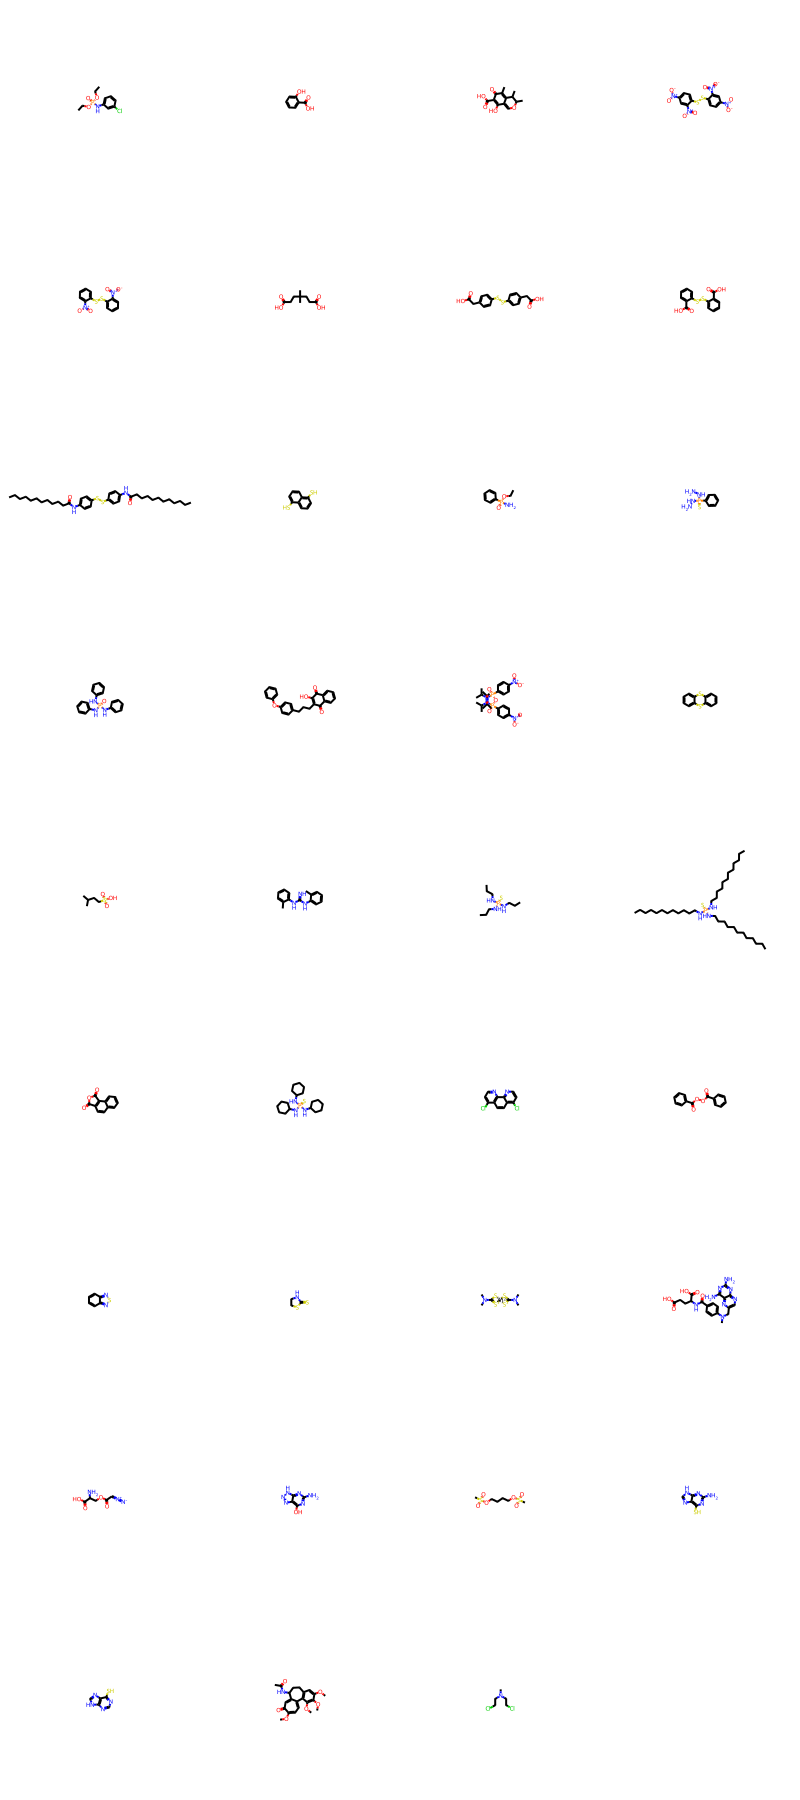

In [ ]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw

sample_smiles=data['smiles'][5:40].values
sample_mols=[Chem.MolFromSmiles(smile) for smile in sample_smiles]
grid=Draw.MolsToGridImage(sample_mols,molsPerRow=4,subImgSize=(200,200))
grid

In [ ]:
sample_negative=[sample for i,sample in data.iterrows() if sample['HIV_active']==0]
sample_negative_1=sample_negative[0:len(sample_negative)//2]
sample_negative_2=sample_negative[len(sample_negative)//2:len(sample_negative)]
sample_negative_1=pd.DataFrame(sample_negative_1)
sample_negative_2=pd.DataFrame(sample_negative_2)

In [ ]:
sample_postive=[sample for i,sample in data.iterrows() if sample['HIV_active']==1]
sample_postive_1=sample_postive[0:len(sample_postive)//2]
sample_postive_2=sample_postive[len(sample_postive)//2:len(sample_postive)]
sample_postive_1=pd.DataFrame(sample_postive_1)
sample_postive_2=pd.DataFrame(sample_postive_2)

In [ ]:
HIV_Train=pd.concat([sample_postive_1,sample_negative_1])
HIV_Train.to_csv('/content/data/raw/HIV_Train.csv')

In [ ]:
HIV_Test=pd.concat([sample_postive_2,sample_negative_2])
HIV_Test.to_csv('/content/data/raw/HIV_Test.csv')

In [ ]:
neg_class=HIV_Train['HIV_active'].value_counts()[0]
pos_class=HIV_Train['HIV_active'].value_counts()[1]
multiplier = int(neg_class/pos_class) - 1

replicated_pos = [HIV_Train[HIV_Train["HIV_active"] == 1]]*multiplier
HIV_Oversample = HIV_Train.append(replicated_pos,ignore_index=True)
HIV_Oversample.to_csv('/content/data/raw/HIV_Oversample.csv')

<ipython-input-12-2699efd2a531>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  HIV_Oversample = HIV_Train.append(replicated_pos,ignore_index=True)


In [ ]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 6.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 92.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.1/282.1 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 29.5 MB/s eta 0:00:00
  Created wheel for torch-geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910454 sha256=dfe248f2c0896d218832f63c6ff47024d094a5345089f44e7d498297bfedd50a
  Stored in directory: /root/.cache/pip/wheels/25/78/6c/9fd091ca1c5e137c66cbd03696ffa14f75e9abc5abfe0dbcc6
Successfully built torc

In [ ]:
!pip install deepchem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 552.4/552.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 kB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 28.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import torch
import torch_geometric
from torch_geometric.data import Dataset
import numpy as np
import os
from tqdm import tqdm
import deepchem as dc
from rdkit import Chem

print(f"Torch version: {torch.__version__}")
print(f"Cuda available: {torch.cuda.is_available()}")
print(f"Torch geometric version: {torch_geometric.__version__}")

class MoleculeDataset(Dataset):
    def __init__(self, root, filename, test=False, transform=None, pre_transform=None):
        """
        root = Where the dataset should be stored. This folder is split
        into raw_dir (downloaded dataset) and processed_dir (processed data).
        """
        self.test = test
        self.filename = filename
        super(MoleculeDataset, self).__init__(root, transform, pre_transform)

    @property
    def raw_file_names(self):
        """ If this file exists in raw_dir, the download is not triggered.
            (The download func. is not implemented here)
        """
        return self.filename

    @property
    def processed_file_names(self):
        """ If these files are found in raw_dir, processing is skipped"""
        self.data = pd.read_csv(self.raw_paths[0]).reset_index()

        if self.test:
            return [f'data_test_{i}.pt' for i in list(self.data.index)]
        else:
            return [f'data_{i}.pt' for i in list(self.data.index)]


    def download(self):
        pass

    def process(self):
        self.data = pd.read_csv(self.raw_paths[0]).reset_index()
        featurizer = dc.feat.MolGraphConvFeaturizer(use_edges=True)
        for index, row in tqdm(self.data.iterrows(), total=self.data.shape[0]):
            mol = Chem.MolFromSmiles(row["smiles"])
            f = featurizer._featurize(mol)
            data = f.to_pyg_graph()
            data.y = self._get_label(row["HIV_active"])
            data.smiles = row["smiles"]
            if self.test:
                torch.save(data,
                    os.path.join(self.processed_dir,
                                 f'data_test_{index}.pt'))
            else:
                torch.save(data,
                    os.path.join(self.processed_dir,
                                 f'data_{index}.pt'))


    def _get_label(self, label):
        label = np.asarray([label])
        return torch.tensor(label, dtype=torch.int64)

    def len(self):
        return self.data.shape[0]

    def get(self, idx):
        """ - Equivalent to __getitem__ in pytorch
            - Is not needed for PyG's InMemoryDataset
        """
        if self.test:
            data = torch.load(os.path.join(self.processed_dir,
                                 f'data_test_{idx}.pt'))
        else:
            data = torch.load(os.path.join(self.processed_dir,
                                 f'data_{idx}.pt'))
        return data




Torch version: 2.0.1+cu118
Cuda available: False
Torch geometric version: 2.3.1


In [ ]:
train_dataset=MoleculeDataset(root='/content/data',filename='HIV_Train.csv')
test_dataset=MoleculeDataset(root='/content/data',filename='HIV_Test.csv')

Processing...
100%|██████████| 20563/20563 [04:40<00:00, 73.32it/s] 
Done!
Processing...
 72%|███████▏  | 14865/20564 [03:38<01:33, 60.64it/s][06:17:24] WARNING: not removing hydrogen atom without neighbors
[06:17:24] WARNING: not removing hydrogen atom without neighbors
100%|██████████| 20564/20564 [05:06<00:00, 67.07it/s]
Done!


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch_geometric.nn as pyg_nn

class GNNModel(nn.Module):

    def __init__(self, num_node_features, hidden_channels, num_classes):
        super(GNNModel, self).__init__()
        self.conv1 = pyg_nn.GraphConv(num_node_features, hidden_channels)
        self.conv2 = pyg_nn.GraphConv(hidden_channels, hidden_channels)
        self.fc = nn.Linear(hidden_channels, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        x = torch.relu(x)
        x = pyg_nn.global_mean_pool(x, data.batch)
        x = self.fc(x)
        return torch.sigmoid(x)


num_node_features = train_dataset[0].num_node_features
hidden_channels = 64
num_classes = 2
model = GNNModel(num_node_features, hidden_channels, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train(model, train_loader, optimizer, criterion):
    model.train()
    for data in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, data.y)
        loss.backward()
        optimizer.step()

# Convert datasets to DataLoader
from torch_geometric.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Training
num_epochs = 10
for epoch in range(num_epochs):
    train(model, train_loader, optimizer, criterion)
    print(f'Epoch [{epoch+1}/{num_epochs}]')

# Evaluation
def evaluate(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in loader:
            outputs = model(data)
            _, predicted = torch.max(outputs, 1)
            total += data.y.size(0)
            correct += (predicted == data.y).sum().item()
    accuracy = correct / total
    return accuracy

train_accuracy = evaluate(model, train_loader)
test_accuracy = evaluate(model, test_loader)

print(f'Train Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

/usr/local/lib/python3.11/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch [1/10]
Epoch [2/10]
Epoch [3/10]
Epoch [4/10]
Epoch [5/10]
Epoch [6/10]
Epoch [7/10]
Epoch [8/10]
Epoch [9/10]
Epoch [10/10]
Train Accuracy: 96.49%
Test Accuracy: 96.49%


In [ ]:
r=torch.load('/content/data/processed/data_10450.pt')
r

Data(x=[46, 30], edge_index=[2, 102], edge_attr=[102, 11], y=[1], smiles='COc1ccc(N=C2SC(=NC(=Nc3ccccc3)SCc3ccccc3)N(c3ccccc3)C2=Nc2ccc(OC)cc2)cc1')

In [ ]:
import deepchem as dc
import torch

smiles = "COc1ccc(N=C2SC(=NC(=Nc3ccccc3)SCc3ccccc3)N(c3ccccc3)C2=Nc2ccc(OC)cc2)cc1"
featurizer = dc.feat.MolGraphConvFeaturizer(use_edges=True)
mol = Chem.MolFromSmiles(smiles)
data = featurizer.featurize(mol)[0].to_pyg_graph()
with torch.no_grad():
    output = model(data)
    predicted_class = torch.argmax(output).item()
print(f"Predicted Class: {predicted_class}")

Predicted Class: 0


In [ ]:
torch.save(model.state_dict(), 'model_weights.pth')

In [ ]:
import torch

model = GNNModel(30,64,2)
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

smiles = "COc1ccc(N=C2SC(=NC(=Nc3ccccc3)SCc3ccccc3)N(c3ccccc3)C2=Nc2ccc(OC)cc2)cc1"
featurizer = dc.feat.MolGraphConvFeaturizer(use_edges=True)
mol = Chem.MolFromSmiles(smiles)
data = featurizer.featurize(mol)[0].to_pyg_graph()
with torch.no_grad():
    output = model(data)
    predicted_class = torch.argmax(output).item()

# Perform inference
with torch.no_grad():
    predictions = model(data)

# Post-processing, if needed (e.g., applying softmax)
probabilities = torch.softmax(predictions, dim=1)

# Use the predictions or probabilities as needed for your application
print(probabilities)


tensor([[0.7311, 0.2689]])


In [ ]:
num_node_features

30

In [ ]:
print(mol)

In [ ]:
# Draw the molecule
img = Draw.MolToImage(mol)

# Display the image
img.show()


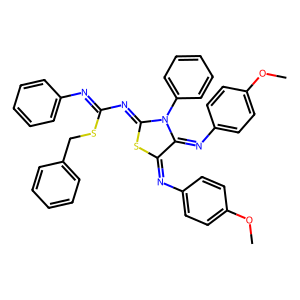

In [ ]:
img

In [ ]:
smiles = "CC(C)CC(=O)"
featurizer = dc.feat.MolGraphConvFeaturizer(use_edges=True)
mol = Chem.MolFromSmiles(smiles)
data = featurizer.featurize(mol)[0].to_pyg_graph()

In [ ]:
data

Data(x=[6, 30], edge_index=[2, 10], edge_attr=[10, 11])

In [ ]:
smiles='COc1ccc(N=C2SC(=NC(=Nc3ccccc3)SCc3ccccc3)N(c3ccccc3)C2=Nc2ccc(OC)cc2)cc1'
featurizer = dc.feat.MolGraphConvFeaturizer(use_edges=True)
mol = Chem.MolFromSmiles(smiles)
img=Draw.MolToImage(mol)
img.show()
img
data = featurizer.featurize(mol)[0].to_pyg_graph()
with torch.no_grad():
    output = model(data)
    predicted_class = torch.argmax(output).item()
predicted_class


0

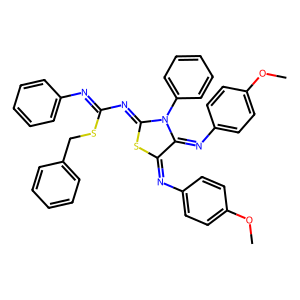

In [ ]:
img

In [ ]:
data

Data(x=[46, 30], edge_index=[2, 102], edge_attr=[102, 11])

In [ ]:
torch.__version__

'2.0.1+cu118'

In [ ]:
torch_geometric.__version__

'2.3.1'

In [ ]:
import deepchem
deepchem.__version__

'2.5.0'